In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [21]:
clean_df = pd.read_csv("../data/clean/clean_summer_df_events.csv") 

In [22]:
country_df = pd.read_csv("../data/raw/country_table.csv") 
event_df = pd.read_csv("../data/raw/event_table.csv") 

In [23]:
clean_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china


In [24]:
country_df.head()

,country_name,continent,hemisphere
0,afghanistan,asia,northern
1,albania,europe,northern
2,algeria,africa,northern
3,argentina,south america,southern
4,armenia,asia,northern


In [25]:
merged_df = clean_df.merge(country_df, left_on="athlete_country", right_on="country_name", how = 'left').reset_index(drop=True)

merged_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country,country_name,continent,hemisphere
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,roc,"europe, asia",northern
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,roc,"europe, asia",northern
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,switzerland,europe,northern
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,serbia,europe,northern
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,china,asia,northern


In [26]:
event_df.head()

,event,discipline,sub-discipline
0,archery - women's individual,archery,archery
1,archery - men's individual,archery,archery
2,archery - individual competition men,archery,archery
3,archery - individual competition women,archery,archery
4,archery - individual fita olympic round 70m men,archery,archery


In [27]:
merged_df = merged_df.merge(event_df, left_on="event", right_on="event", how = 'left').reset_index(drop=True)

merged_df.head()

,Unnamed: 0,host_country,game_year,event,medal_type,athlete_country,country_name,continent,hemisphere,discipline,sub-discipline
0,0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,roc,"europe, asia",northern,shooting,shooting
1,1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,roc,"europe, asia",northern,shooting,shooting
2,2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,switzerland,europe,northern,shooting,shooting
3,3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,serbia,europe,northern,shooting,shooting
4,4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,china,asia,northern,shooting,shooting


In [28]:
merged_df.columns

Index(['Unnamed: 0', 'host_country', 'game_year', 'event', 'medal_type',
       'athlete_country', 'country_name', 'continent', 'hemisphere',
       'discipline', 'sub-discipline'],
      dtype='object')

In [29]:
merged_df = merged_df[['host_country', 'game_year', 'event', 'medal_type',
       'athlete_country', 'continent', 'hemisphere',
       'discipline', 'sub-discipline']]

In [30]:
merged_df = merged_df.rename(columns={'continent': 'athlete_continent', 'hemisphere': 'athlete_hemisphere'})

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting


In [31]:
merged_df = merged_df.merge(country_df, left_on="host_country", right_on="country_name", how = 'left').reset_index(drop=True)

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,country_name,continent,hemisphere
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,japan,asia,northern
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,japan,asia,northern
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,japan,asia,northern
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,japan,asia,northern
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,japan,asia,northern


In [32]:
merged_df = merged_df.rename(columns={'continent': 'host_continent', 'hemisphere': 'host_hemisphere'})

merged_df.drop(columns="country_name", inplace=True)

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,host_continent,host_hemisphere
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,asia,northern
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,asia,northern
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,asia,northern
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,asia,northern
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,asia,northern


In [33]:
merged_df['is_host_country'] = merged_df['host_country'] == merged_df['athlete_country']
merged_df['is_host_continent'] = merged_df['host_continent'] == merged_df['athlete_continent']

merged_df.head()

,host_country,game_year,event,medal_type,athlete_country,athlete_continent,athlete_hemisphere,discipline,sub-discipline,host_continent,host_hemisphere,is_host_country,is_host_continent
0,japan,2020,shooting - 50m rifle 3 positions women,silver,roc,"europe, asia",northern,shooting,shooting,asia,northern,False,False
1,japan,2020,shooting - 50m rifle 3 positions women,bronze,roc,"europe, asia",northern,shooting,shooting,asia,northern,False,False
2,japan,2020,shooting - 50m rifle 3 positions women,gold,switzerland,europe,northern,shooting,shooting,asia,northern,False,False
3,japan,2020,shooting - 50m rifle 3 positions men,bronze,serbia,europe,northern,shooting,shooting,asia,northern,False,False
4,japan,2020,shooting - 50m rifle 3 positions men,gold,china,asia,northern,shooting,shooting,asia,northern,False,True


In [34]:
merged_df.columns

Index(['host_country', 'game_year', 'event', 'medal_type', 'athlete_country',
       'athlete_continent', 'athlete_hemisphere', 'discipline',
       'sub-discipline', 'host_continent', 'host_hemisphere',
       'is_host_country', 'is_host_continent'],
      dtype='object')

In [35]:
filt_df = merged_df[['game_year', 'event', 'medal_type', 'athlete_country',
       'athlete_continent', 'discipline',
       'sub-discipline', 'host_country', 'host_continent',
       'is_host_country', 'is_host_continent']]

filt_df.tail()

,game_year,event,medal_type,athlete_country,athlete_continent,discipline,sub-discipline,host_country,host_continent,is_host_country,is_host_continent
16397,2024,water polo - men,gold,serbia,europe,water polo,water polo,france,europe,False,True
16398,2024,water polo - men,silver,croatia,europe,water polo,water polo,france,europe,False,True
16399,2024,water polo - men,bronze,usa,north america,water polo,water polo,france,europe,False,False
16400,2024,rhythmic gymnastics - group all-around,silver,israel,asia,gymnastics,gymnastics rhythmic,france,europe,False,False
16401,2024,rhythmic gymnastics - group all-around,bronze,italy,europe,gymnastics,gymnastics rhythmic,france,europe,False,True


In [36]:
country_medals = filt_df.groupby(['athlete_country', 'game_year', 'medal_type', 'discipline',
                                  'is_host_country', 'is_host_continent']).size().reset_index(name='medal_count')

country_medals.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count
0,afghanistan,2008,bronze,taekwondo,False,True,1
1,afghanistan,2012,bronze,taekwondo,False,False,1
2,albania,2024,bronze,wrestling,False,True,2
3,algeria,1984,bronze,boxing,False,False,2
4,algeria,1992,bronze,boxing,False,False,1


In [37]:
last40 = country_medals[country_medals['game_year'] > 1980]

last40hosts = list(last40[last40['is_host_country'] == True]['athlete_country'])

piv = last40.pivot_table(
    index=['athlete_country', 'is_host_country'],  
    columns=['game_year'],  
    values='medal_count', 
    aggfunc='sum', 
    fill_value=0 
)

column_totals = piv.sum(axis=0)
piv_pct = round((piv.div(column_totals, axis=1) * 100),2).reset_index()

# Step 2: Calculate the average percentage across all game_years (columns)
#piv_pct['average_%'] = piv_pct.iloc[:, 2:].mean(axis=1)  # Skip index columns, take the mean of the medal percentages

last_40_win_rates = piv_pct[piv_pct['athlete_country'].isin(last40hosts)]

last_40_win_rates

game_year,athlete_country,is_host_country,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
5,australia,False,3.49,1.90,3.21,4.87,0.00,5.40,4.81,3.66,2.98,4.26,5.26
6,australia,True,0.00,0.00,0.00,0.00,6.26,0.00,0.00,0.00,0.00,0.00,0.00
16,brazil,False,1.16,0.81,0.37,1.78,1.29,1.08,1.78,1.78,0.00,1.95,1.98
17,brazil,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.95,0.00,0.00
25,china,False,4.65,3.80,6.55,5.94,6.26,6.80,0.00,9.51,7.19,8.16,8.43
26,china,True,0.00,0.00,0.00,0.00,0.00,0.00,10.45,0.00,0.00,0.00,0.00
49,france,False,4.07,2.17,3.58,4.39,4.10,3.56,4.49,3.66,4.32,3.06,0.00
50,france,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.95
56,great britain,False,5.38,3.26,2.47,1.78,3.02,3.24,5.33,0.00,6.89,6.02,5.85
57,great britain,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.79,0.00,0.00,0.00


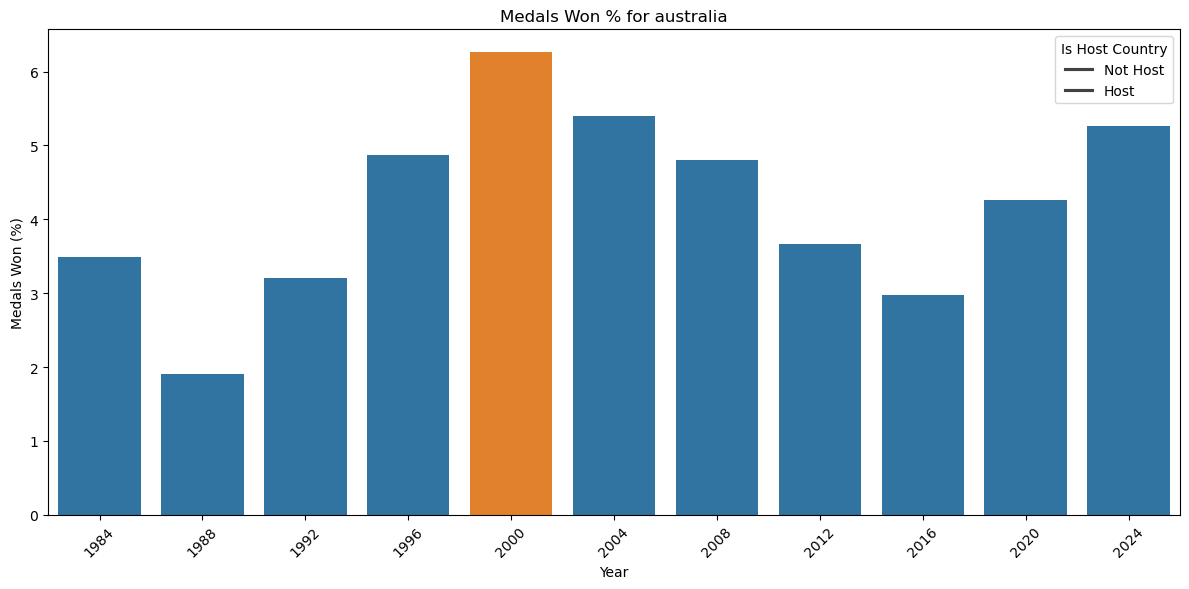

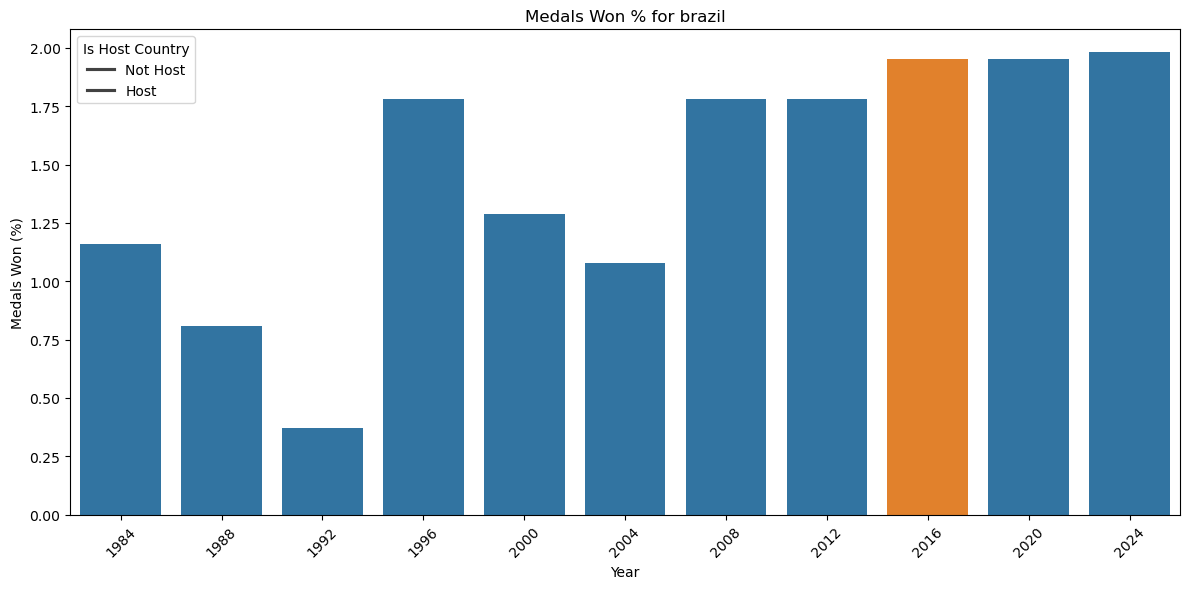

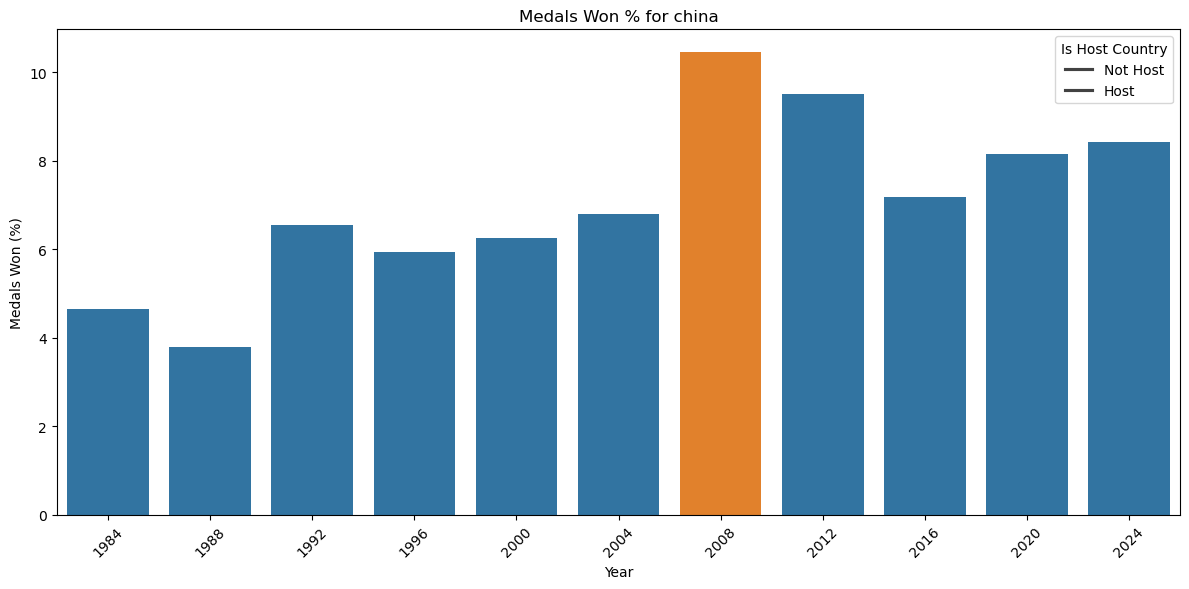

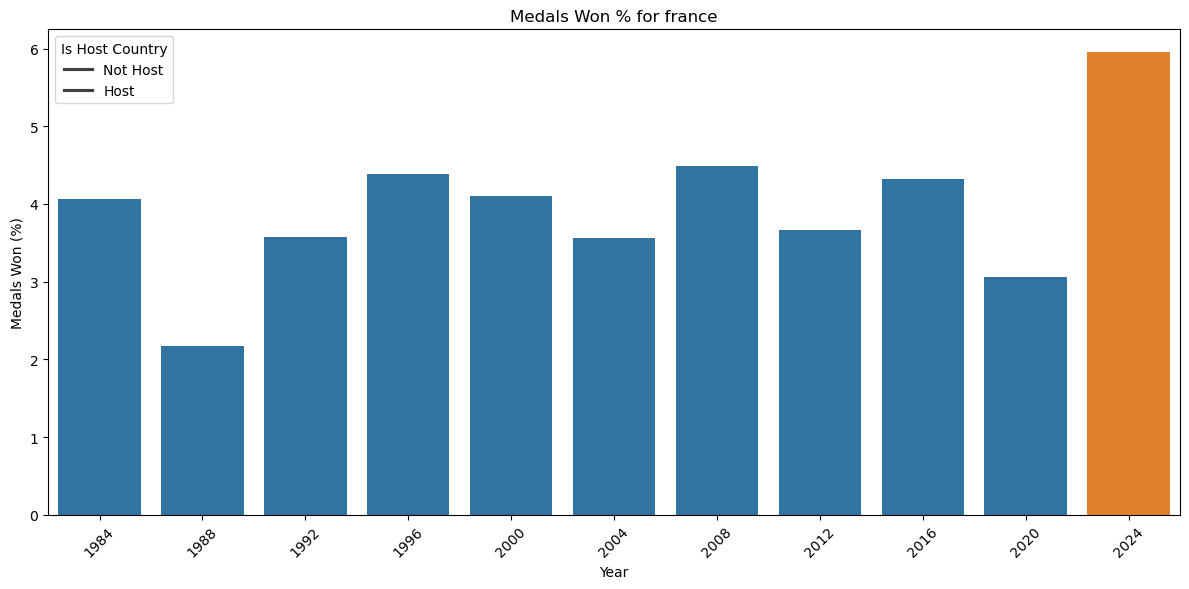

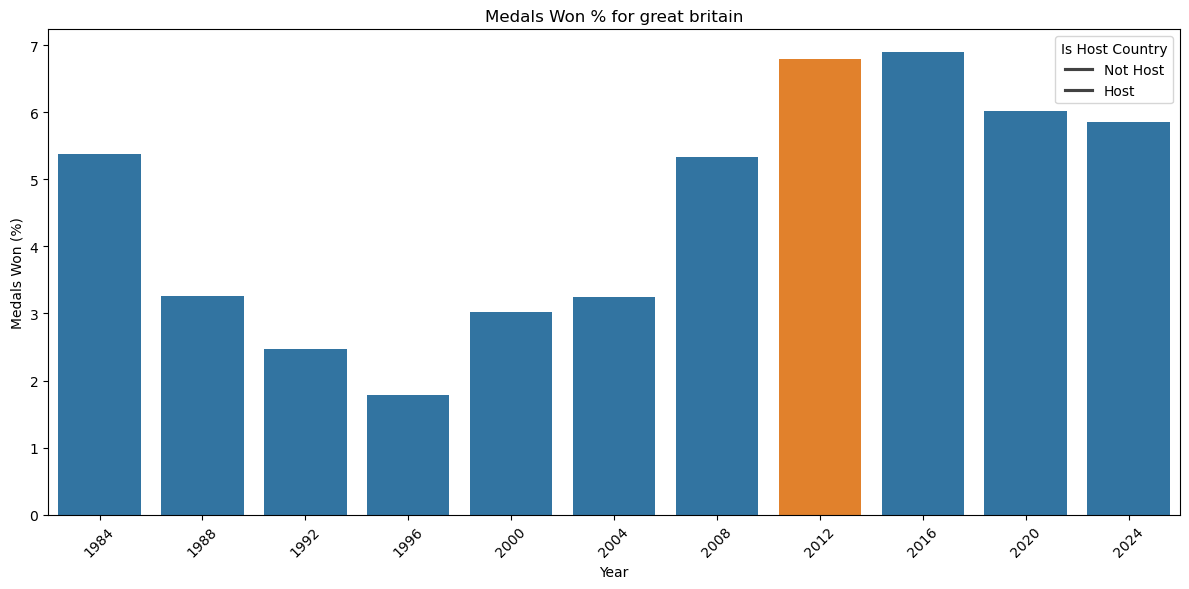

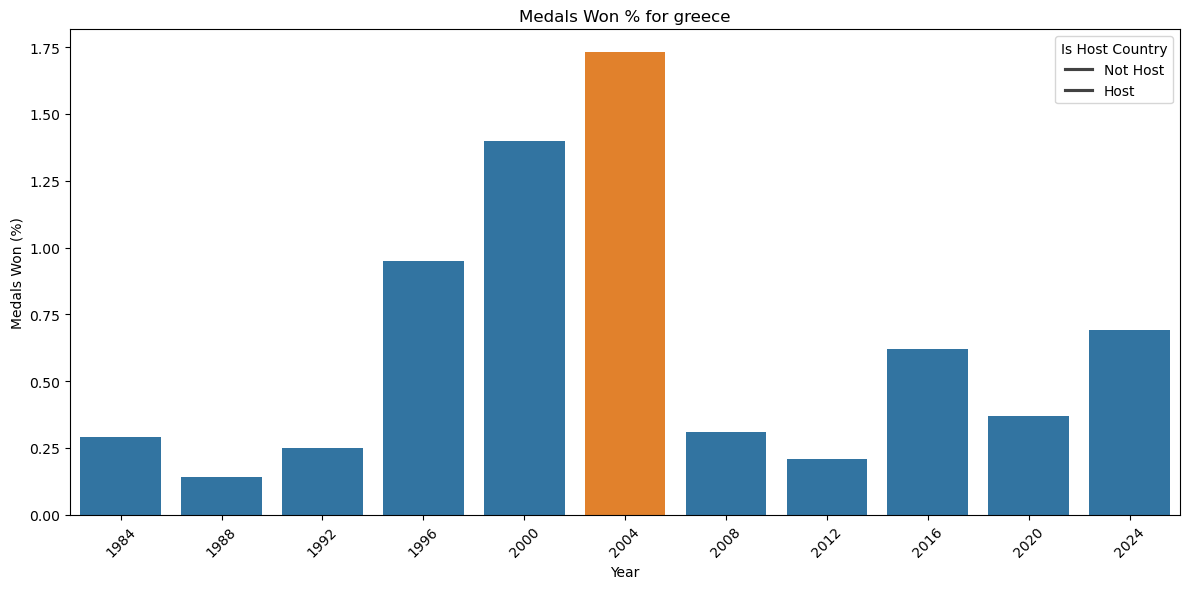

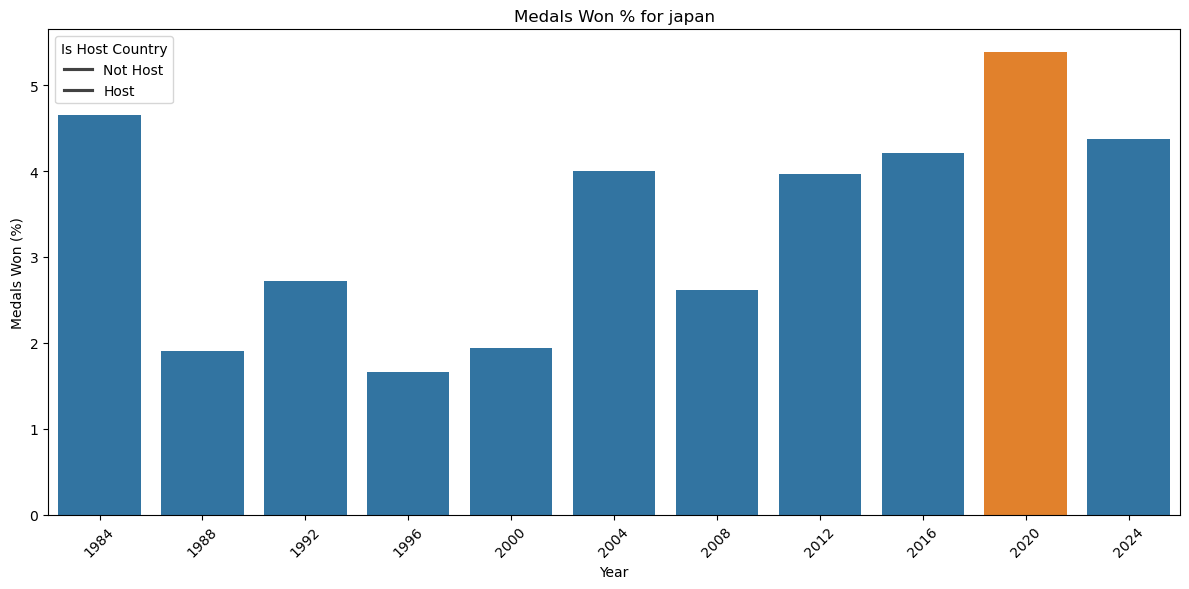

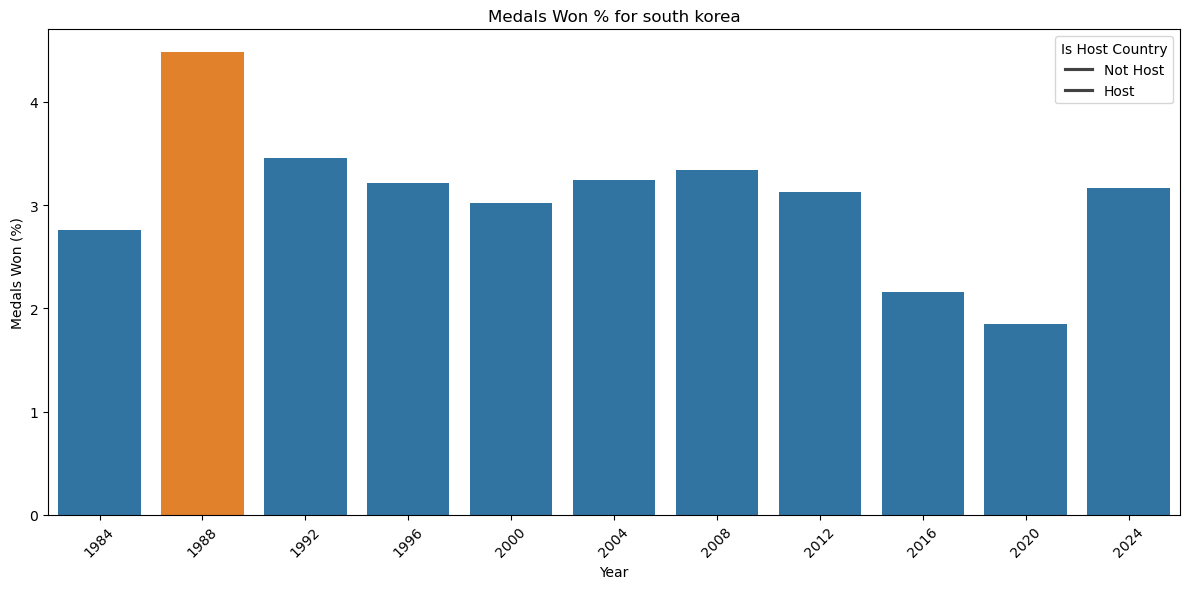

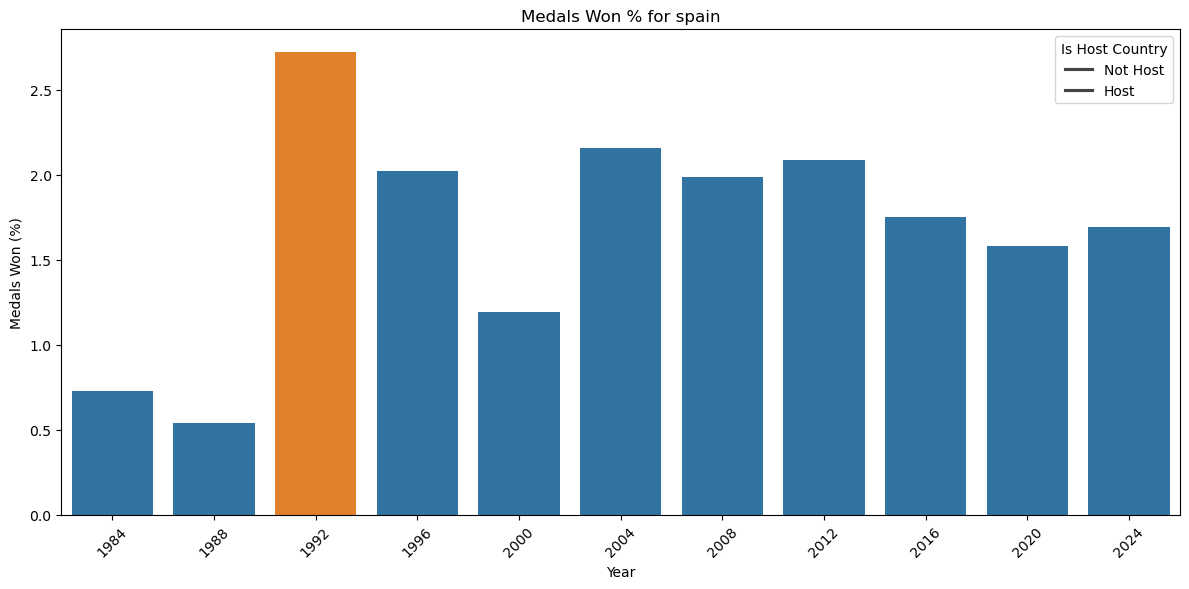

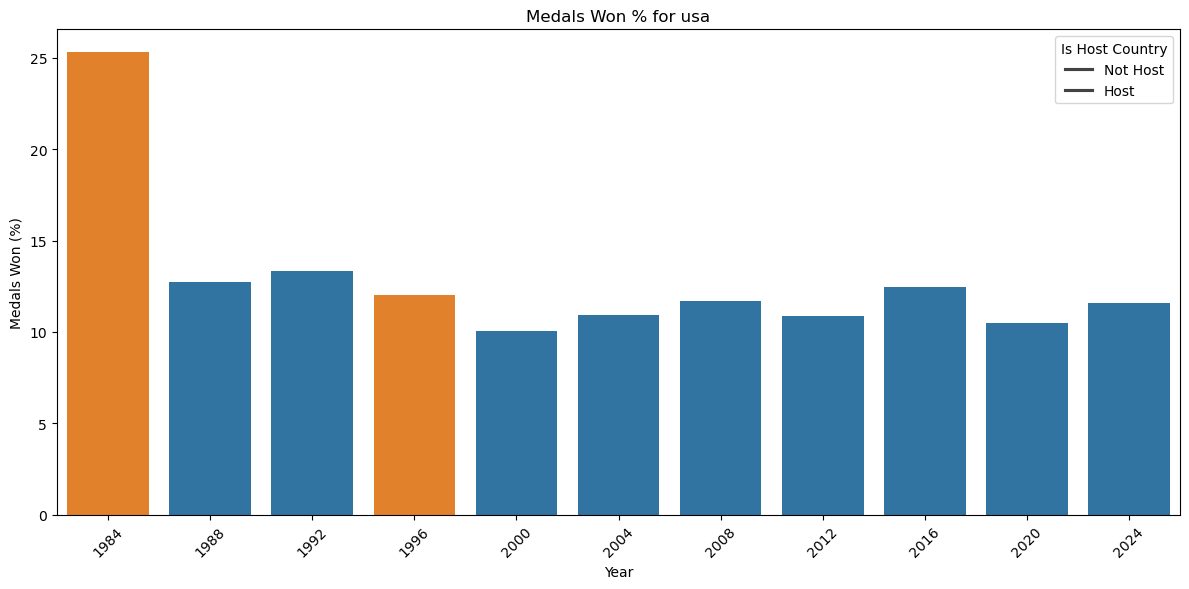

In [38]:
import matplotlib.pyplot as plt

for country in last_40_win_rates['athlete_country'].unique():
    # Filter data for the current country
    country_data = last_40_win_rates[last_40_win_rates['athlete_country'] == country]
    
    # Melt the data to have a 'game_year' column and 'medal_percentage' with 'is_host_country' as variable
    country_data_melted = country_data.melt(
        id_vars=['athlete_country', 'is_host_country'],
        var_name='game_year',
        value_name='medal_percentage'
    )
    
    # Convert game_year to integers for proper sorting and plotting
    country_data_melted['game_year'] = country_data_melted['game_year'].astype(int)
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_data_melted,
        x='game_year',
        y='medal_percentage',
        hue='is_host_country',
        dodge=False
    )
    
    # Set plot title and labels
    plt.title(f"Medals Won % for {country}")
    plt.xlabel("Year")
    plt.ylabel("Medals Won (%)")
    plt.xticks(rotation=45)
    
    # Adjust legend to show 'Host' and 'Not Host' instead of True/False
    plt.legend(title="Is Host Country", labels=["Not Host", "Host"])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

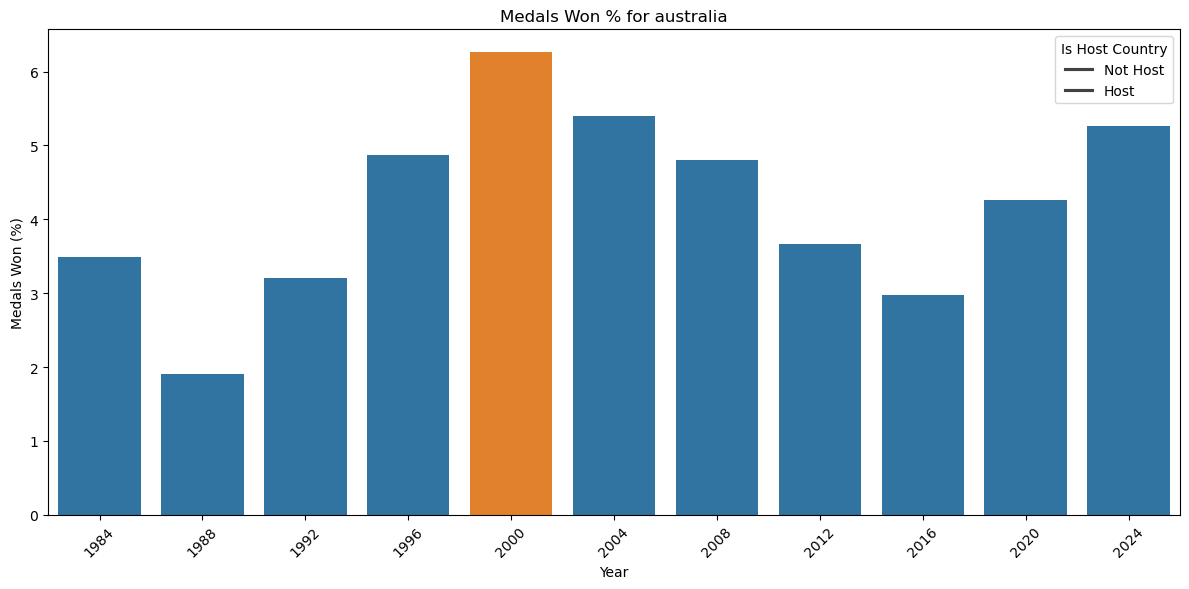

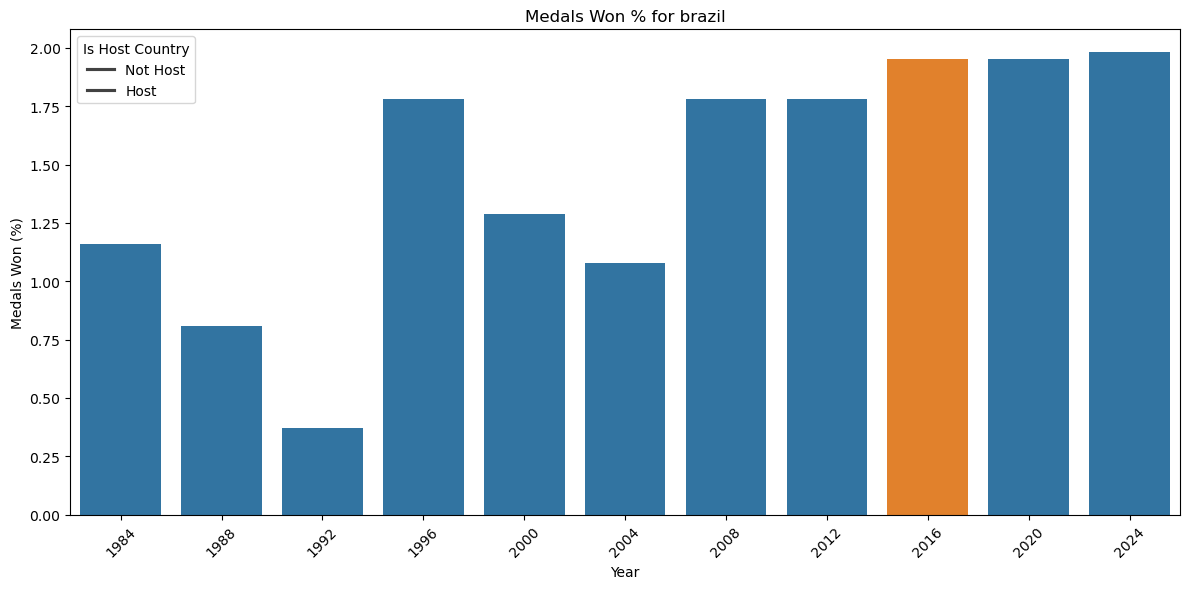

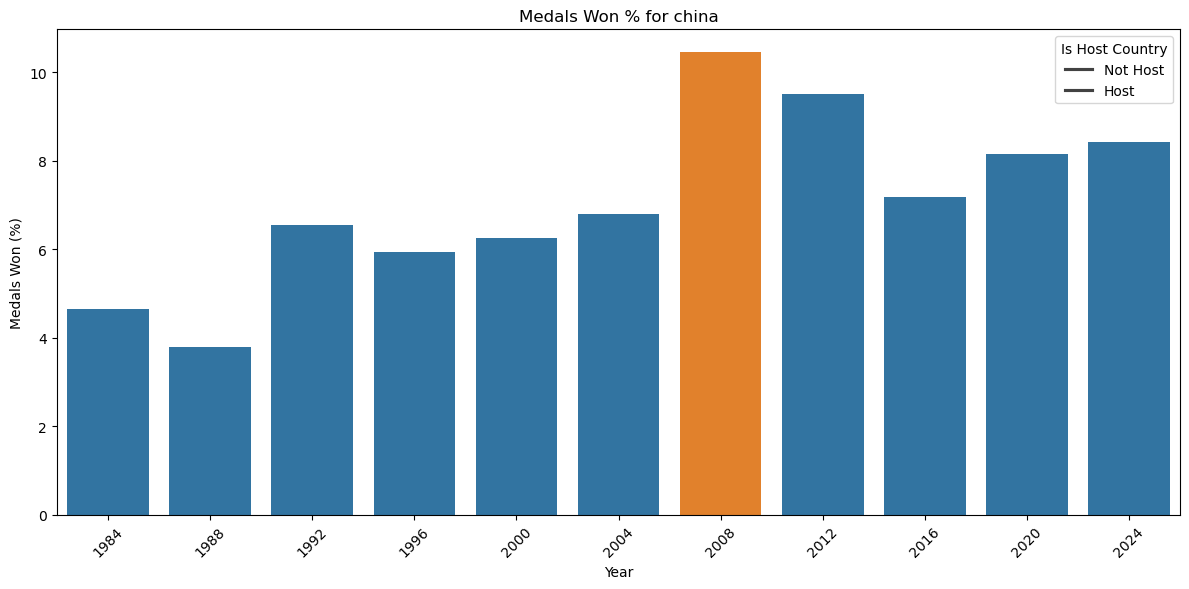

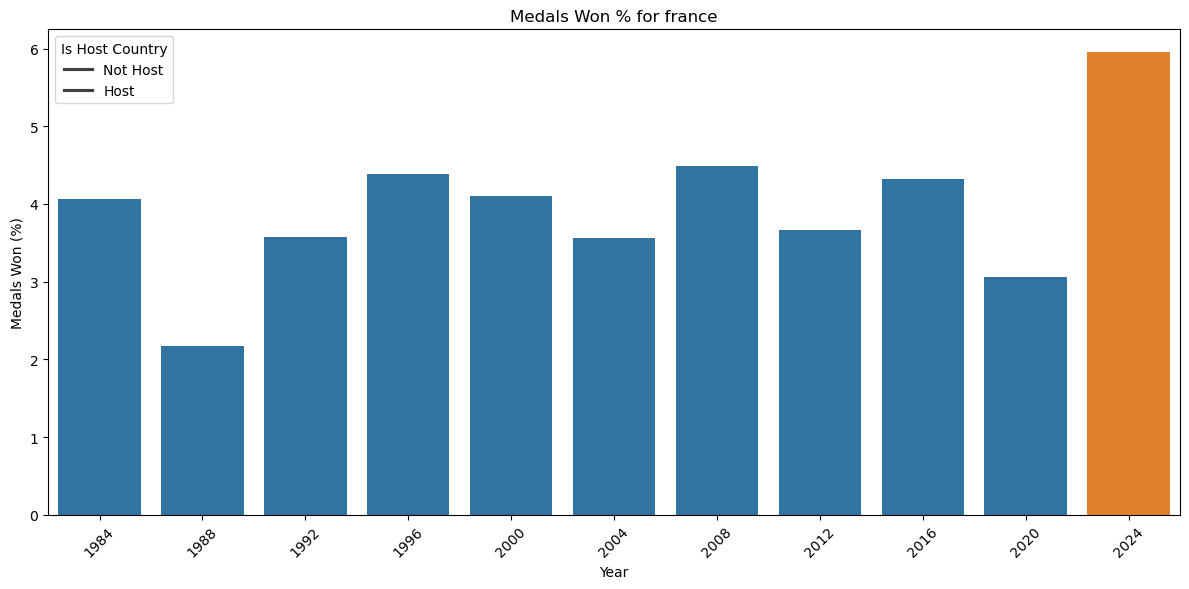

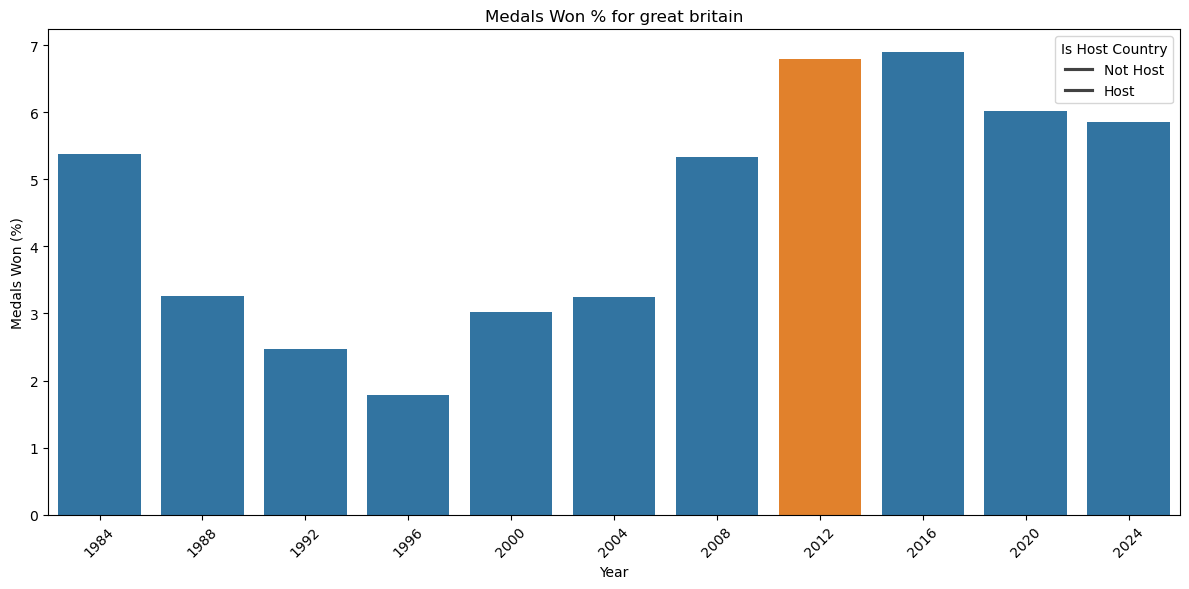

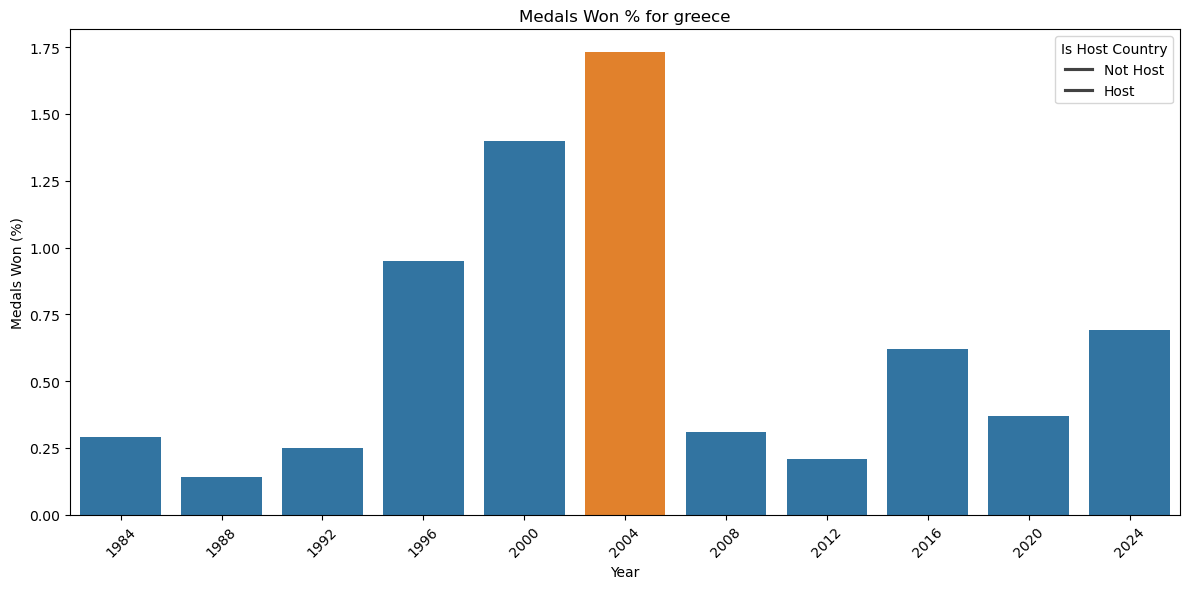

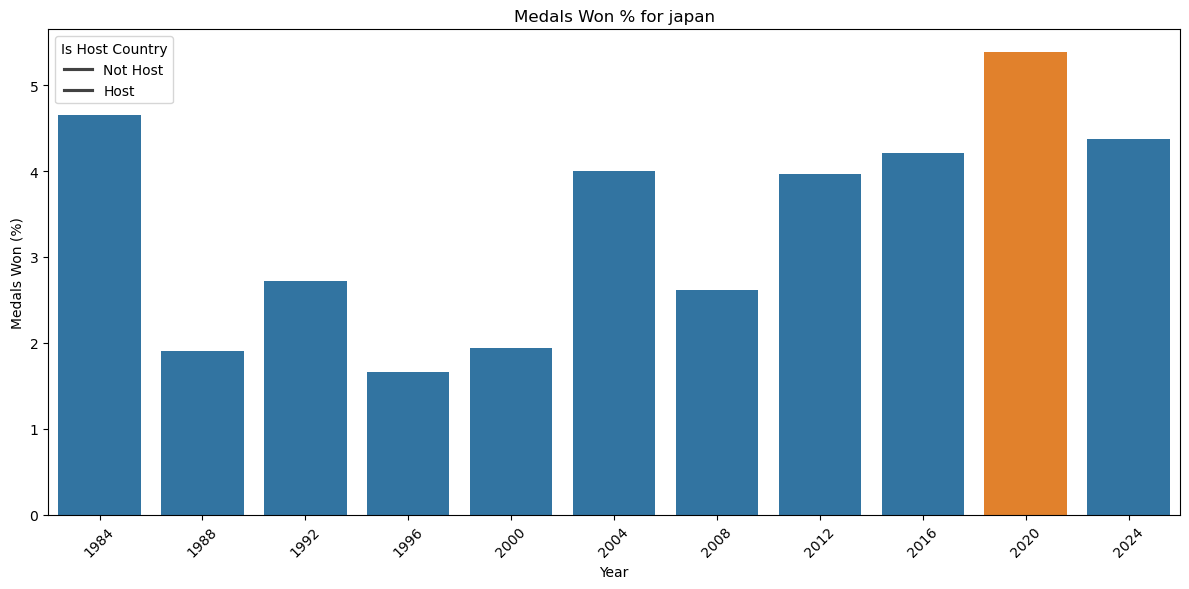

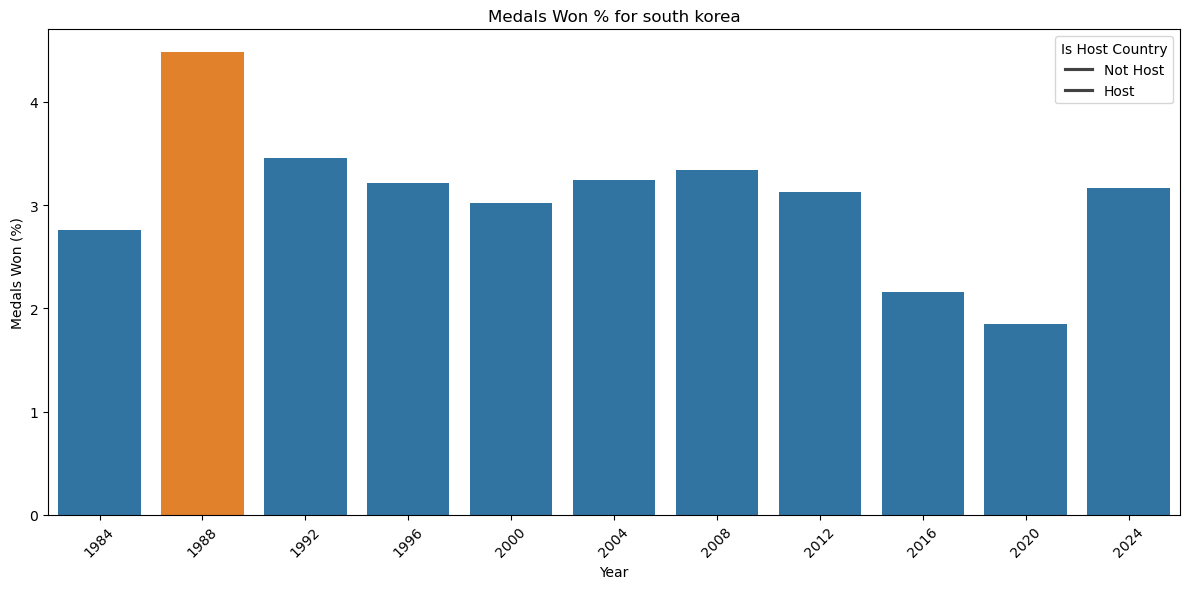

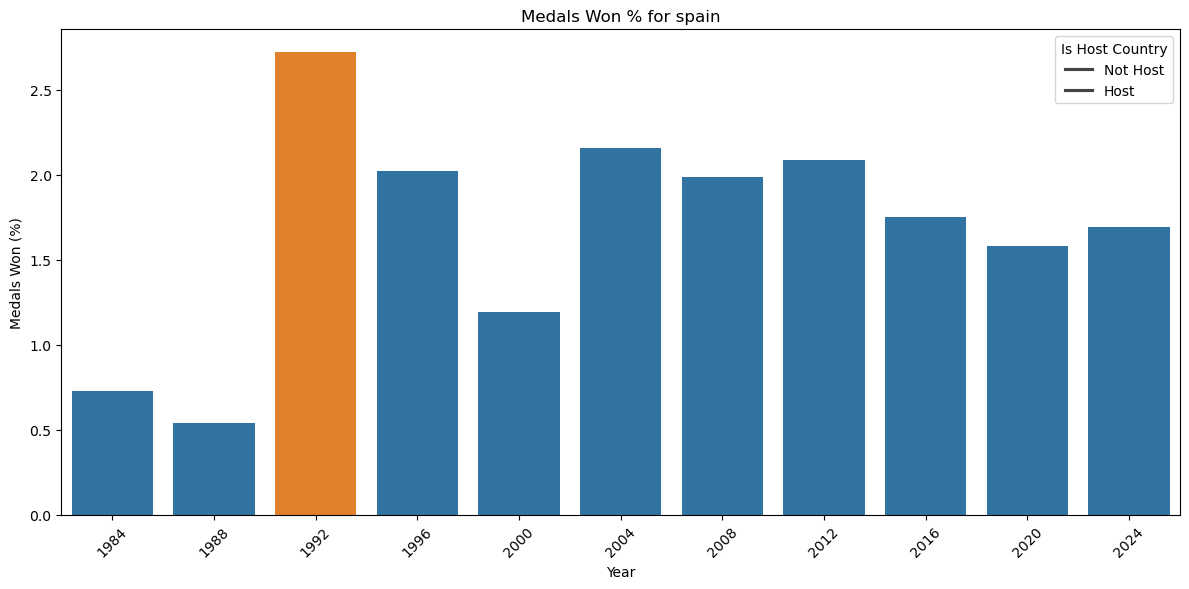

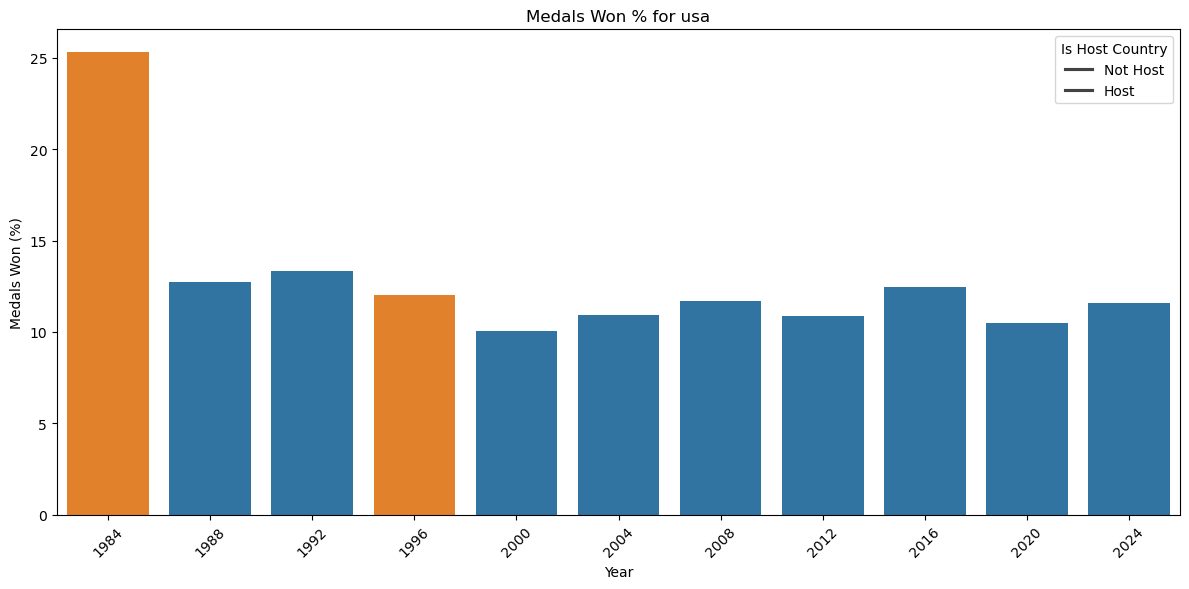

In [38]:
import matplotlib.pyplot as plt

for country in last_40_win_rates['athlete_country'].unique():
    # Filter data for the current country
    country_data = last_40_win_rates[last_40_win_rates['athlete_country'] == country]
    
    # Melt the data to have a 'game_year' column and 'medal_percentage' with 'is_host_country' as variable
    country_data_melted = country_data.melt(
        id_vars=['athlete_country', 'is_host_country'],
        var_name='game_year',
        value_name='medal_percentage'
    )
    
    # Convert game_year to integers for proper sorting and plotting
    country_data_melted['game_year'] = country_data_melted['game_year'].astype(int)
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=country_data_melted,
        x='game_year',
        y='medal_percentage',
        hue='is_host_country',
        dodge=False
    )
    
    # Set plot title and labels
    plt.title(f"Medals Won % for {country}")
    plt.xlabel("Year")
    plt.ylabel("Medals Won (%)")
    plt.xticks(rotation=45)
    
    # Adjust legend to show 'Host' and 'Not Host' instead of True/False
    plt.legend(title="Is Host Country", labels=["Not Host", "Host"])
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [136]:
def country_wins_by_year(df=country_medals, country_list=['france'], start_year=1984):
    import matplotlib.pyplot as plt
    import pandas as pd
    
    year_filt = df[df['game_year'] >= start_year]
       
    piv = year_filt.pivot_table(
        index=['athlete_country', 'is_host_country'],  
        columns=['game_year'],  
        values='medal_count', 
        aggfunc='sum', 
        fill_value=0 
    )
    
    column_totals = piv.sum(axis=0)
    piv_pct = round((piv.div(column_totals, axis=1) * 100),2).reset_index()
    
    win_rates = piv_pct[piv_pct['athlete_country'].isin(country_list)]
    
    for country in country_list:
        # Filter data for the current country
        country_data = win_rates[win_rates['athlete_country'] == country]
        
        # Melt the data to have a 'game_year' column and 'medal_percentage' with 'is_host_country' as variable
        country_data_melted = country_data.melt(
            id_vars=['athlete_country', 'is_host_country'],
            var_name='game_year',
            value_name='medal_percentage'
        )
        
        # Convert game_year to integers for proper sorting and plotting
        country_data_melted['game_year'] = country_data_melted['game_year'].astype(int)
        
        # Plot
        plt.figure(figsize=(12, 6))
        sns.barplot(
            data=country_data_melted,
            x='game_year',
            y='medal_percentage',
            hue='is_host_country',
            dodge=False
        )
        
        # Set plot title and labels
        plt.title(f"{country.title()} Medal Win%")
        plt.xlabel("Year")
        plt.ylabel("Medals of Total (%)")
        plt.xticks(rotation=45)
        
        # Adjust legend to show 'Host' and 'Not Host' instead of True/False
        plt.legend(title="Is Host Country", labels=["Not Host", "Host"])
        
        # Show the plot
        plt.tight_layout()
        plt.show()

    return(win_rates)

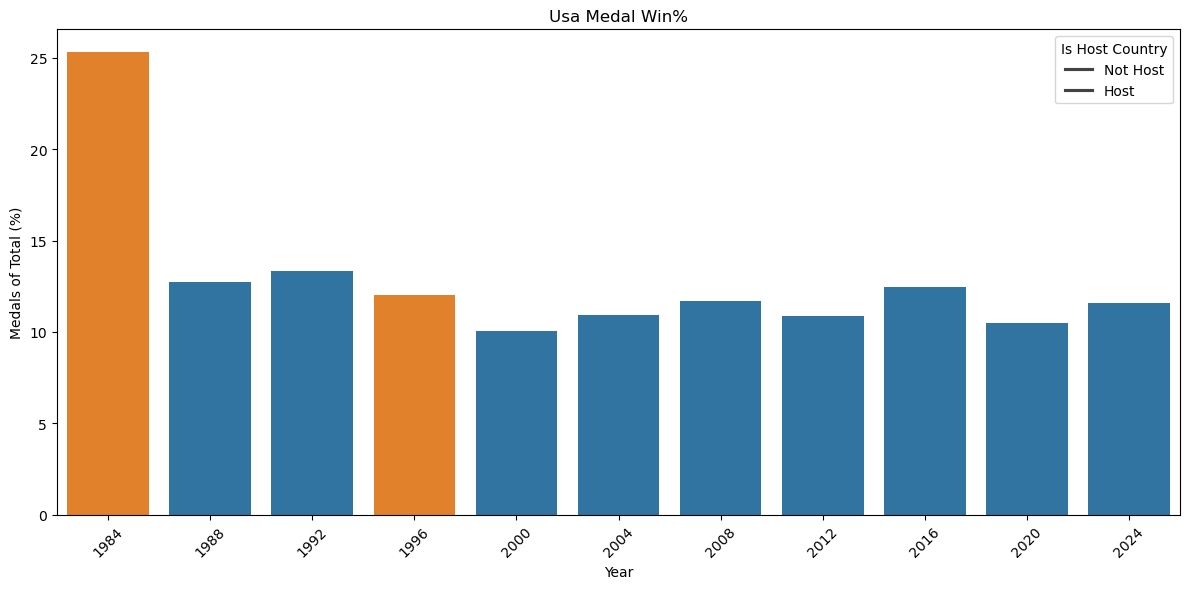

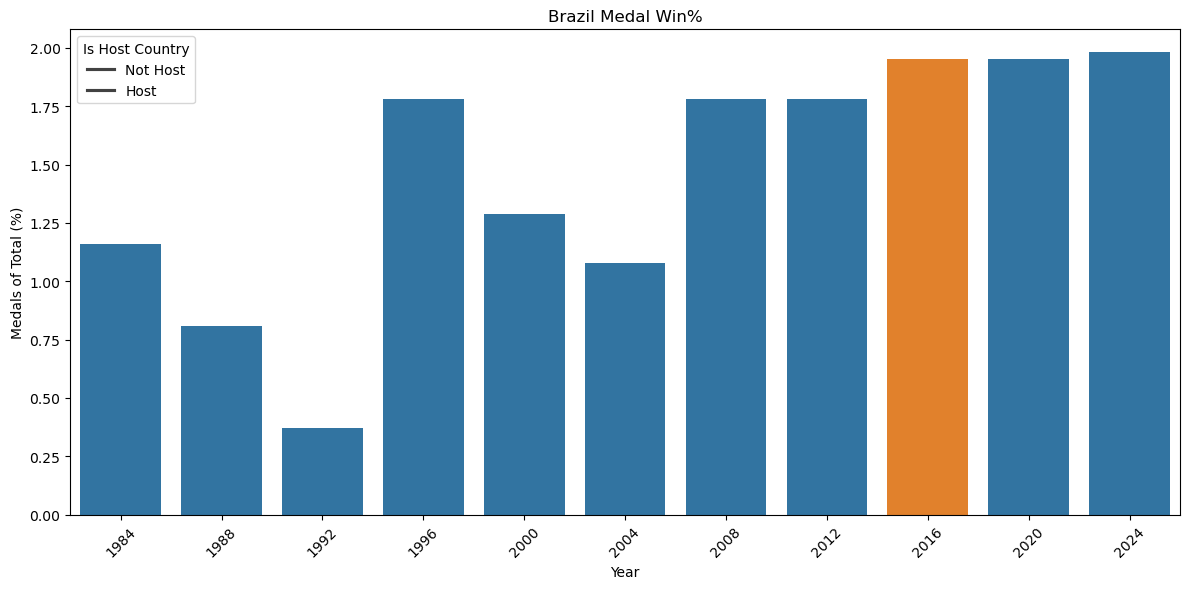

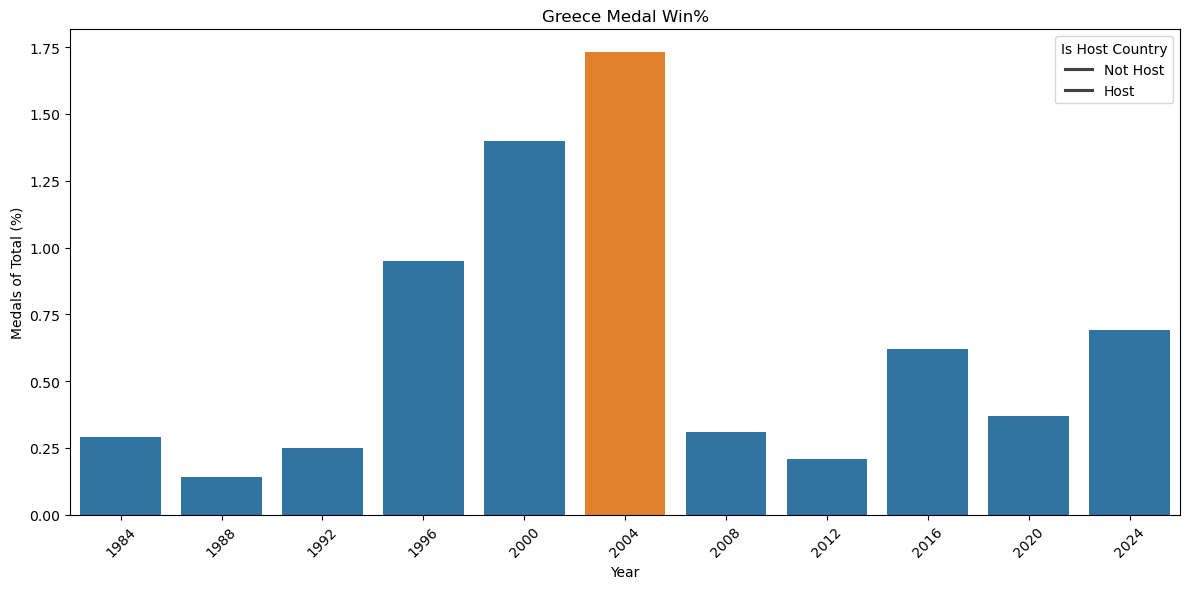

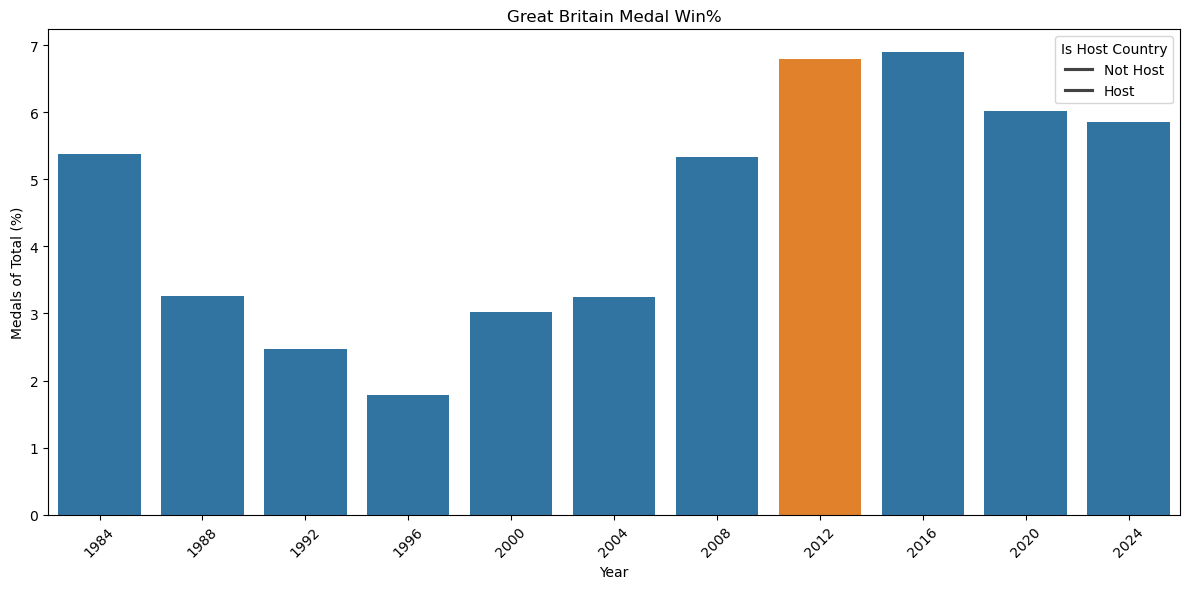

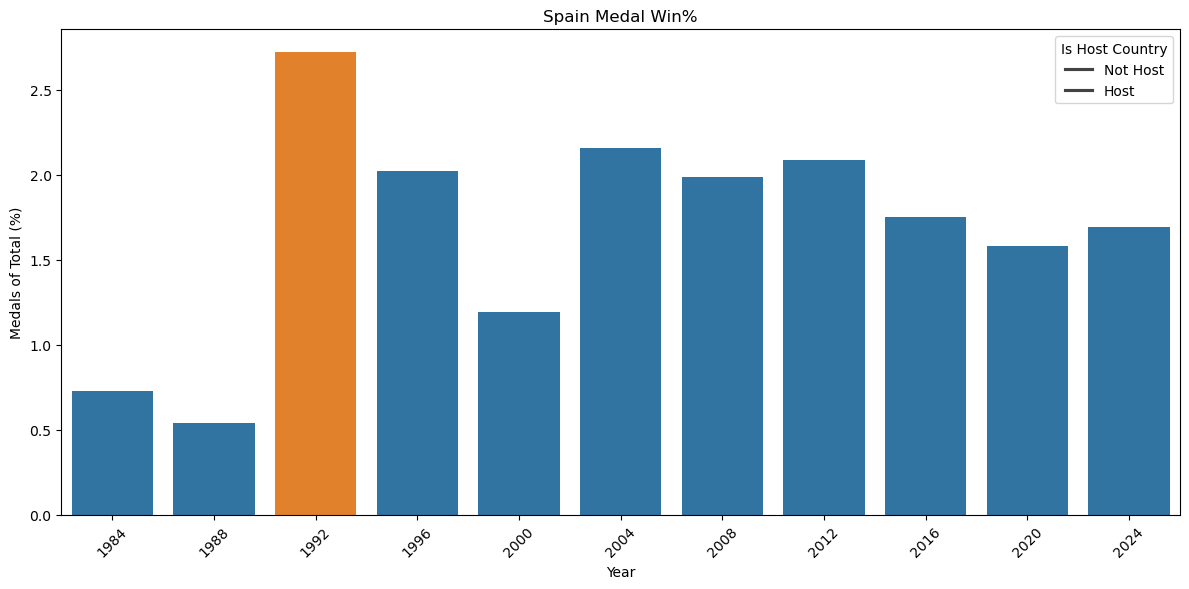

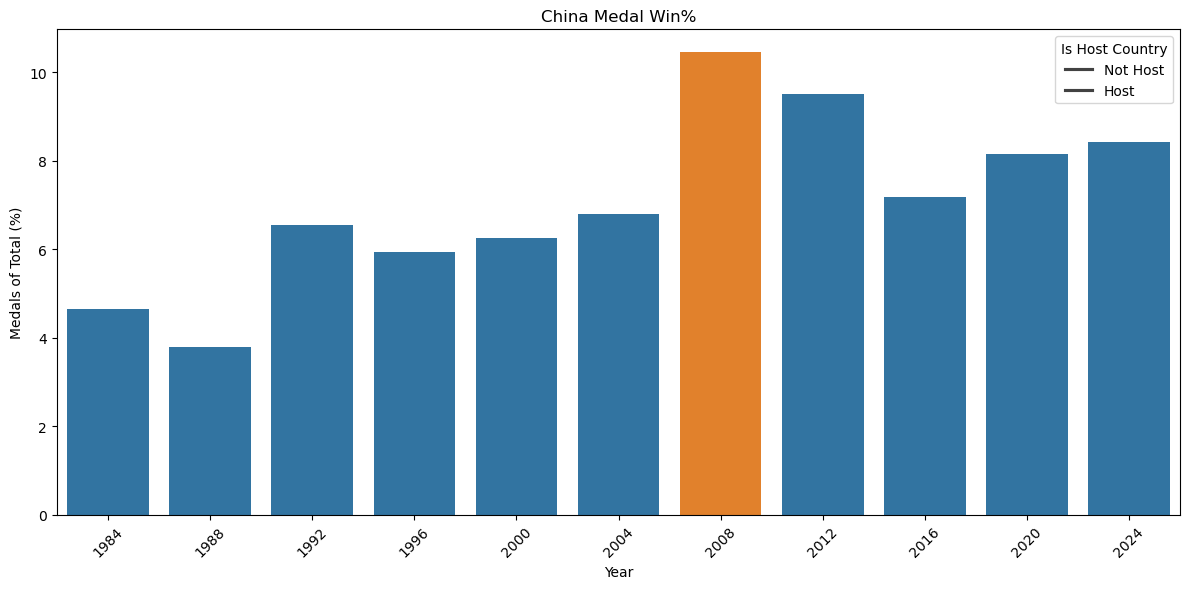

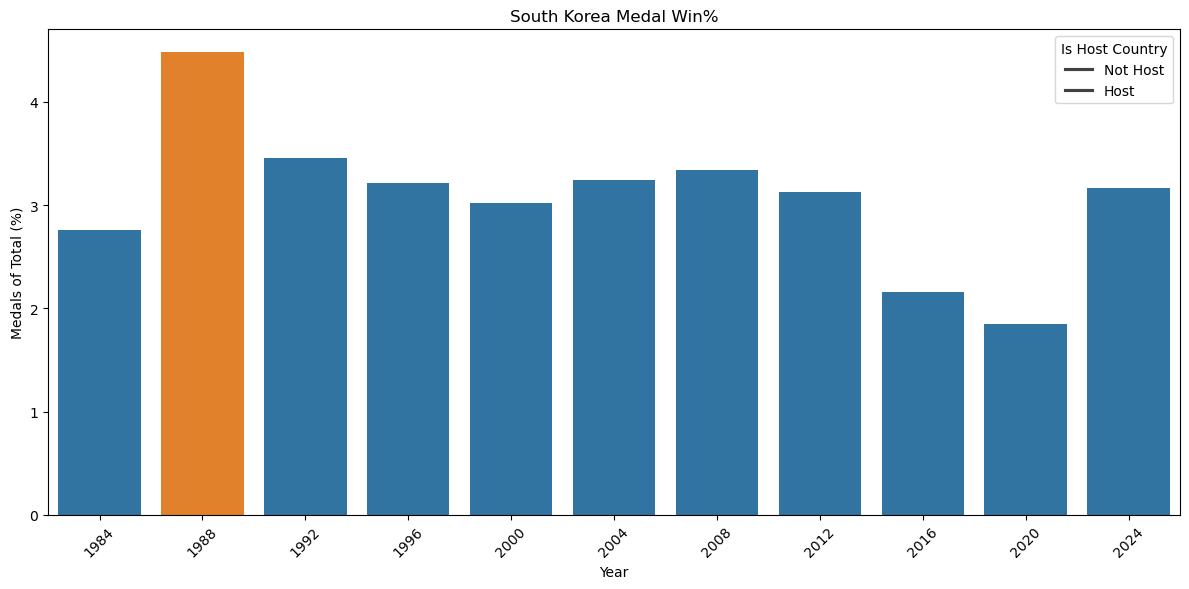

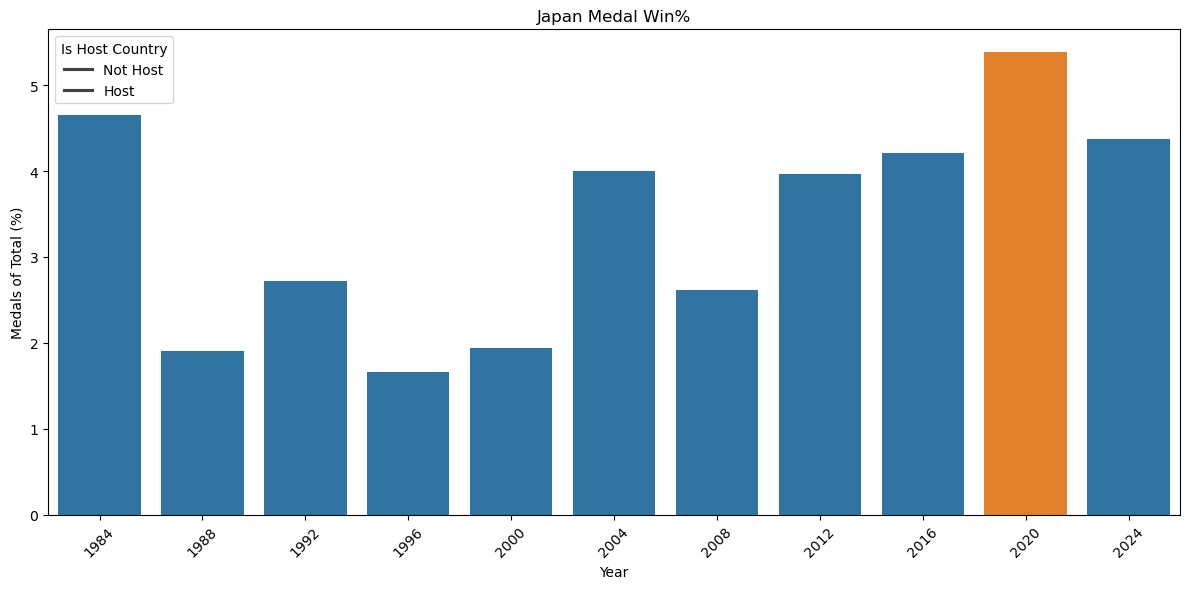

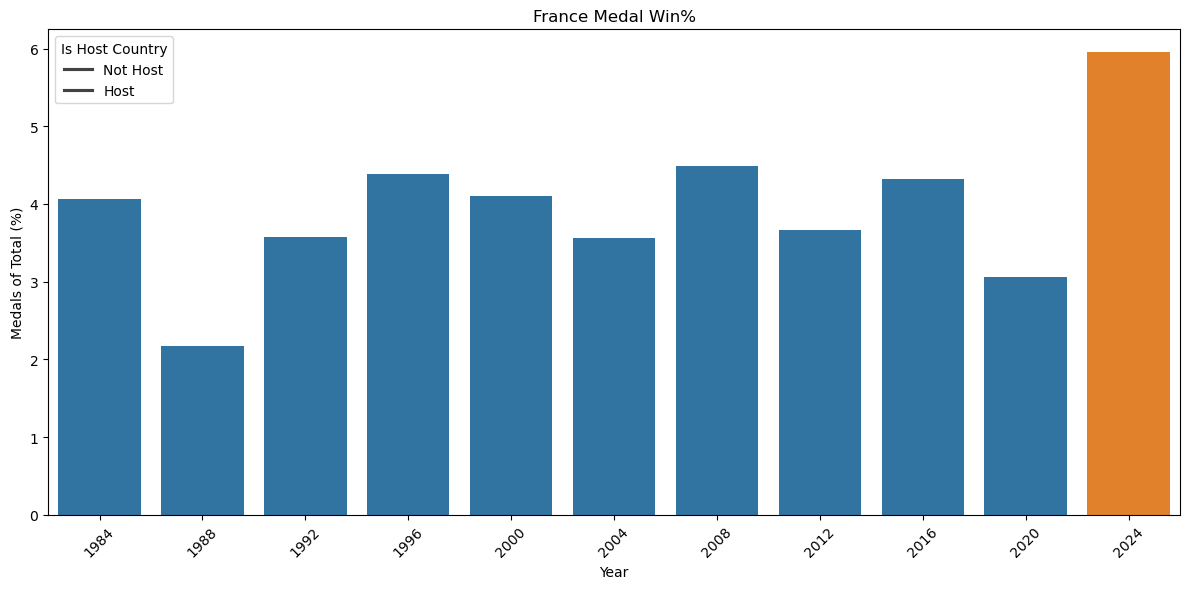

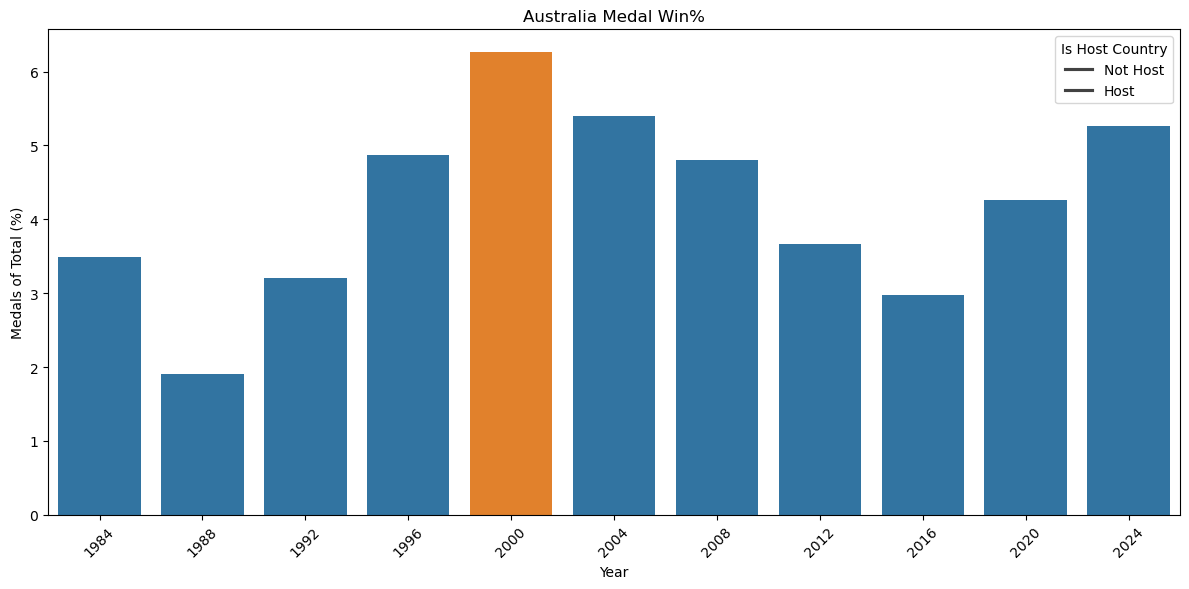

game_year,athlete_country,is_host_country,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
5,australia,False,3.49,1.90,3.21,4.87,0.00,5.40,4.81,3.66,2.98,4.26,5.26
6,australia,True,0.00,0.00,0.00,0.00,6.26,0.00,0.00,0.00,0.00,0.00,0.00
16,brazil,False,1.16,0.81,0.37,1.78,1.29,1.08,1.78,1.78,0.00,1.95,1.98
17,brazil,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.95,0.00,0.00
25,china,False,4.65,3.80,6.55,5.94,6.26,6.80,0.00,9.51,7.19,8.16,8.43
26,china,True,0.00,0.00,0.00,0.00,0.00,0.00,10.45,0.00,0.00,0.00,0.00
49,france,False,4.07,2.17,3.58,4.39,4.10,3.56,4.49,3.66,4.32,3.06,0.00
50,france,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.95
56,great britain,False,5.38,3.26,2.47,1.78,3.02,3.24,5.33,0.00,6.89,6.02,5.85
57,great britain,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.79,0.00,0.00,0.00


In [138]:
from_year = 1984

last40 = country_medals.copy()
last40 = last40[last40['game_year'] >= from_year]

hosts = list(set(last40[last40['is_host_country'] == True]['athlete_country']))

country_wins_by_year(last40, hosts, from_year)

In [40]:
country_medals.head()

,athlete_country,game_year,medal_type,discipline,is_host_country,is_host_continent,medal_count
0,afghanistan,2008,bronze,taekwondo,False,True,1
1,afghanistan,2012,bronze,taekwondo,False,False,1
2,albania,2024,bronze,wrestling,False,True,2
3,algeria,1984,bronze,boxing,False,False,2
4,algeria,1992,bronze,boxing,False,False,1


In [76]:
def get_ratio_data(df=country_medals, year_from=1960):
    '''dateframe must have these columns:
    ['athlete_country', 'game_year', 'is_host_country', 'is_host_continent']
    '''   
    #year filter
    df = df[df['game_year'] >= year_from]
    
    df = df.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()
    
    # total medals for each year
    df['year_total_medals'] = df.groupby('game_year')['medal_count'].transform('sum')
    
    # percentage of medals each country won per year
    df['medal_pct'] = (df['medal_count'] / df['year_total_medals']) * 100
    
    # `avg_win%` for each country across all years
    avg_win = (
        df.groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_win%'})
    )
    
    # Calculate `avg_hosting_win%` - average win percentage when the country is hosting
    avg_hosting_win = (
        df[df['is_host_country']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_hosting_win%'})
    )
    
    # Calculate `avg_not_hosting_win%` - average win percentage when the country is not hosting
    avg_not_hosting_win = (
        df[~df['is_host_country']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_not_hosting_win%'})
    )
    
    # Calculate `avg_continent_win%` - average win percentage when a country on the same continent is hosting
    avg_continent_win = (
        df[df['is_host_continent']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_continent_win%'})
    )
    
    avg_not_continent_win = (
        df[~df['is_host_continent']]
        .groupby('athlete_country', as_index=False)['medal_pct']
        .mean().round(2)
        .rename(columns={'medal_pct': 'avg_not_continent_win%'})
    )
    
    
    # Step 8: Combine all results into a single DataFrame
    result = avg_win.merge(avg_hosting_win, on='athlete_country', how='left') \
                    .merge(avg_not_hosting_win, on='athlete_country', how='left') \
                    .merge(avg_continent_win, on='athlete_country', how='left') \
                    .merge(avg_not_continent_win, on='athlete_country', how='left')
    
    result = result.rename(columns={'athlete_country':'country'})
    
    #display(result.sort_values(by='avg_win%', ascending=False))
    
    host_countries = list(df[df['is_host_country'] == True]['athlete_country'].unique())
    
    host_result = result[result['country'].isin(host_countries)]
    
    host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
    host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)
    
    print(f"Since {year_from} hosting delivers an average of { (100*(host_result['host/not_ratio'].mean()-1)).round(2)}% more medals")
    print(f"Since {year_from} being in the host continent wins you { (100*(host_result['continent/not_ratio'].mean()-1)).round(2)}% more medals")
    return(host_result)

In [78]:
get_ratio_data()

Since 1960 hosting delivers an average of 101.29% more medals
Since 1960 being in the host continent wins you 33.21% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
5,australia,3.69,6.26,3.53,6.26,3.53,1.77,1.77
15,brazil,1.08,1.95,1.03,1.95,1.03,1.89,1.89
21,canada,1.94,1.79,1.95,2.94,1.61,0.92,1.83
23,china,7.07,10.45,6.73,7.47,6.92,1.55,1.08
43,federal republic of germany,6.37,6.68,6.29,6.68,6.29,1.06,1.06
46,france,3.30,5.95,3.14,3.34,3.28,1.89,1.02
52,great britain,4.05,6.79,3.88,4.28,3.92,1.75,1.09
53,greece,0.54,1.73,0.46,0.57,0.53,3.76,1.08
68,italy,3.54,7.81,3.27,3.92,3.33,2.39,1.18
70,japan,3.80,5.56,3.54,3.91,3.76,1.57,1.04


In [80]:
def chart_ratio(df, year_from=1960):
    import matplotlib.pyplot as plt
    import seaborn as sns
       
    df_melted = df.melt(id_vars='country', value_vars=['avg_not_hosting_win%', 'avg_win%', 'avg_continent_win%', 'avg_hosting_win%'],
                        var_name='metric', value_name='value')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='country', y='value', hue='metric', data=df_melted)
    
    # Customize the plot
    plt.title(f"Impact of Hosting on Share of Medals Won Since {year_from}")
    plt.xlabel('Country')
    plt.ylabel('Percentage of medals won (%)')
    plt.xticks(rotation=45, ha='right')  # Rotate country labels for better readability
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [94]:
def ratio_data(df, year_from=1960):
    import matplotlib.pyplot as plt
    import seaborn as sns
       
    df_melted = df.melt(id_vars='country', value_vars=['avg_not_hosting_win%', 'avg_win%', 'avg_continent_win%', 'avg_hosting_win%'],
                        var_name='metric', value_name='value')
    
    return(df_melted)

In [82]:
def continent_ratio(df):
    cont_result = df.merge(country_df, left_on="country", right_on="country_name", how = 'left').reset_index(drop=True)
    
    # Group by 'continent' and calculate the mean of 'continent/not_ratio'
    mean_continent_not_ratio = cont_result.groupby('continent')['continent/not_ratio'].mean().round(2).reset_index()
    
    # Display the result
    print(mean_continent_not_ratio)

In [84]:
country_medals['discipline'].value_counts().head(10)

discipline
athletics        1194
wrestling         763
boxing            700
swimming          660
rowing            536
shooting          524
cycling           493
canoe             483
weightlifting     461
gymnastics        449
Name: count, dtype: int64

In [86]:
country_medals['discipline'].unique()

array(['taekwondo', 'wrestling', 'boxing', 'athletics', 'judo',
       'gymnastics', 'polo', 'fencing', 'swimming', 'football', 'rowing',
       'sailing', 'shooting', 'weightlifting', 'equestrian', 'volleyball',
       'tennis', 'hockey', 'basketball', 'cycling', 'rugby', 'diving',
       'canoe', 'baseball/softball', 'beach volleyball', 'archery',
       'water polo', 'trampoline', 'triathlon', 'modern pentathlon',
       'surfing', 'skateboarding', 'handball', 'karate', 'sport climbing',
       'tug of war', 'ice hockey', 'breaking', 'table tennis',
       'badminton', 'golf', 'figure skating'], dtype=object)

In [150]:
ball_sports = ['football','volleyball','tennis', 'hockey', 'basketball','rugby', 'baseball/softball',
               'beach volleyball','water polo','handball','ice hockey', 'table tennis', 'badminton', 'golf']
aquatic = ['swimming','rowing','sailing','diving','canoe','water polo','surfing']
combat = ['taekwondo', 'wrestling', 'boxing', 'judo', 'fencing', 'karate']


sport_df = country_medals[country_medals['discipline'].isin(ball_sports)]
combat_df = country_medals[country_medals['discipline'].isin(combat)]
aqua_df = country_medals[country_medals['discipline'].isin(aquatic)]
gym_df = country_medals[country_medals['discipline'] == 'gymnastics']
ath_df = country_medals[country_medals['discipline'] == 'athletics']
eq_df = country_medals[country_medals['discipline'] == 'equestrian']
cy_df = country_medals[country_medals['discipline'] == 'cycling']
gold_df = country_medals[country_medals['medal_type'] == 'gold']


Overall:
Since 1960 hosting delivers an average of 101.29% more medals
Since 1960 being in the host continent wins you 33.21% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


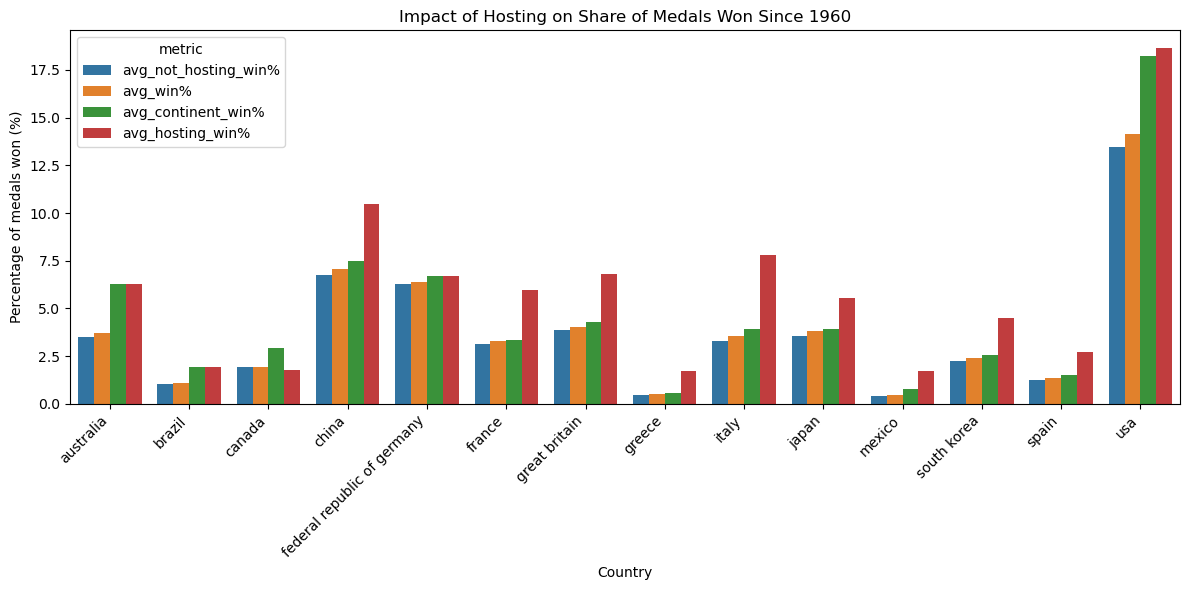

       continent  continent/not_ratio
0           asia                 1.07
1         europe                 1.11
2  north america                 1.70
3        oceania                 1.77
4  south america                 1.89


In [90]:
print("Overall:")
result_df = get_ratio_data()
chart_ratio(result_df)
continent_ratio(result_df)

For golds:
Since 1960 hosting delivers an average of 18.23% more medals
Since 1960 being in the host continent wins you 8.62% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


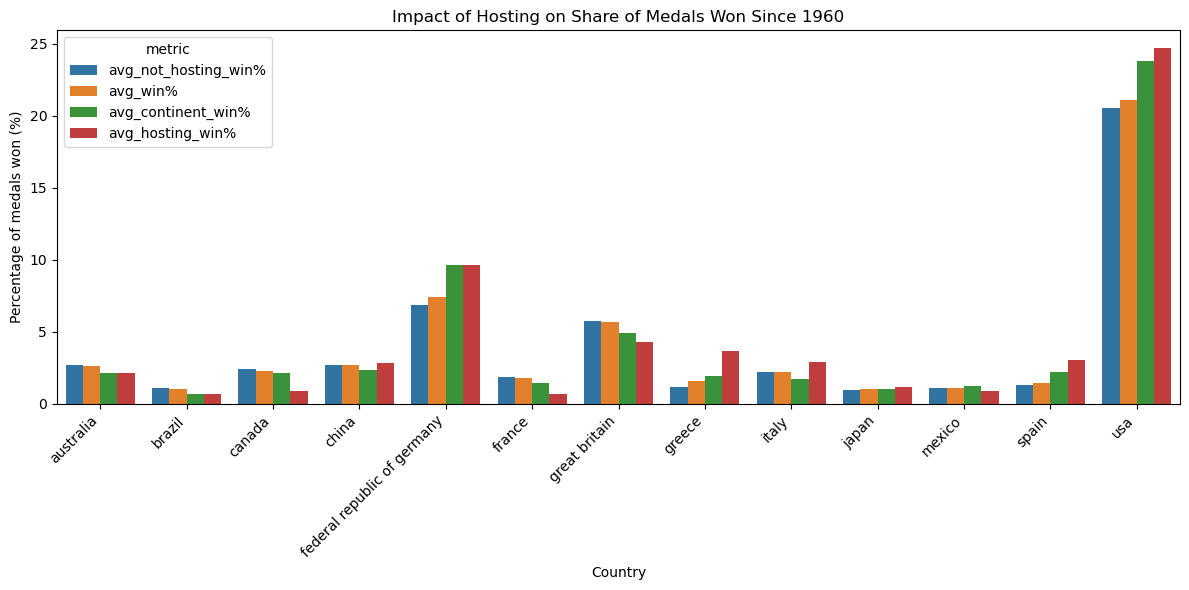

       continent  continent/not_ratio
0           asia                 0.91
1         europe                 1.23
2  north america                 1.15
3        oceania                 0.80
4  south america                 0.65


In [92]:
print("For golds:")
gold_only = get_ratio_data(ath_df, 1960)
chart_ratio(gold_only)
continent_ratio(gold_only)

In [140]:
print("For ball sports:")
get_ratio_data(sport_df, 1960)

For ball sports:
Since 1960 hosting delivers an average of 78.42% more medals
Since 1960 being in the host continent wins you 17.92% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
1,australia,4.36,8.05,4.05,8.05,4.05,1.99,1.99
4,brazil,4.83,4.17,4.89,4.17,4.89,0.85,0.85
9,china,15.01,24.14,14.10,15.82,14.71,1.71,1.08
17,federal republic of germany,7.82,4.76,9.35,4.76,9.35,0.51,0.51
19,france,3.60,8.42,3.00,4.25,3.08,2.81,1.38
23,great britain,2.07,3.57,1.90,1.78,2.26,1.88,0.79
24,greece,1.03,1.15,0.90,1.15,0.90,1.28,1.28
31,italy,3.44,8.33,2.95,3.96,3.01,2.82,1.32
32,japan,5.42,9.61,4.72,6.79,5.04,2.04,1.35
58,south korea,6.51,12.50,5.97,7.15,6.30,2.09,1.13


In [142]:
print("For combat events:")
get_ratio_data(combat_df, 1960)

For combat events:
Since 1960 hosting delivers an average of 105.62% more medals
Since 1960 being in the host continent wins you 34.92% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
5,australia,0.97,1.46,0.87,1.46,0.87,1.68,1.68
12,brazil,1.41,2.07,1.35,2.07,1.35,1.53,1.53
18,china,4.00,6.87,3.68,5.20,3.70,1.87,1.41
32,federal republic of germany,5.03,3.97,5.29,3.97,5.29,0.75,0.75
34,france,5.29,8.76,5.07,4.99,5.45,1.73,0.92
40,great britain,2.19,3.72,2.09,2.68,1.89,1.78,1.42
41,greece,0.92,1.92,0.80,0.95,0.89,2.40,1.07
50,italy,4.62,11.61,4.18,4.90,4.47,2.78,1.10
51,japan,6.47,8.89,6.12,7.20,6.23,1.45,1.16
61,mexico,1.09,4.31,0.80,2.06,0.77,5.39,2.68


In [144]:
print("For aquatic events:")
get_ratio_data(aqua_df, 1960)

For aquatic events:
Since 1960 hosting delivers an average of 66.31% more medals
Since 1960 being in the host continent wins you 54.85% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
1,australia,8.27,12.50,8.01,12.50,8.01,1.56,1.56
7,brazil,1.23,1.92,1.18,1.92,1.18,1.63,1.63
9,canada,3.88,4.84,3.81,6.50,3.00,1.27,2.17
10,china,6.73,8.75,6.53,8.18,6.18,1.34,1.32
19,federal republic of germany,5.86,7.47,5.45,7.47,5.45,1.37,1.37
21,france,2.95,4.67,2.83,3.41,2.67,1.65,1.28
24,great britain,4.67,8.53,4.43,5.18,4.39,1.93,1.18
25,greece,0.78,1.95,0.65,0.91,0.64,3.00,1.42
31,italy,3.03,4.27,2.95,3.41,2.82,1.45,1.21
32,japan,2.24,1.31,2.39,1.57,2.50,0.55,0.63


In [146]:
print("For gymnastics:")
get_ratio_data(gym_df, 1960)

For gymnastics:
Since 1960 hosting delivers an average of 29.0% more medals
Since 1960 being in the host continent wins you 12.56% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
4,brazil,5.19,6.25,4.83,6.25,4.83,1.29,1.29
7,china,14.80,31.25,13.16,17.25,13.89,2.37,1.24
17,great britain,6.23,8.33,5.71,6.25,6.22,1.46,1.00
18,greece,2.40,2.08,2.47,2.08,2.56,0.84,0.81
22,italy,5.83,6.98,5.64,6.95,4.34,1.24,1.60
23,japan,14.72,16.73,14.38,10.45,16.42,1.16,0.64
33,south korea,2.83,2.08,2.93,2.75,2.88,0.71,0.95
35,spain,2.35,2.00,2.40,3.08,2.05,0.83,1.50
40,usa,14.14,21.57,12.65,15.14,13.80,1.71,1.10


In [148]:
print("For athletics:")
get_ratio_data(ath_df, 1960)

For athletics:
Since 1960 hosting delivers an average of 18.23% more medals
Since 1960 being in the host continent wins you 8.62% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
1,australia,2.65,2.16,2.69,2.16,2.69,0.80,0.80
9,brazil,1.06,0.71,1.09,0.71,1.09,0.65,0.65
14,canada,2.31,0.90,2.45,2.14,2.37,0.37,0.90
15,china,2.70,2.86,2.69,2.37,2.83,1.06,0.84
31,federal republic of germany,7.42,9.65,6.87,9.65,6.87,1.40,1.40
33,france,1.78,0.70,1.85,1.47,1.96,0.38,0.75
36,great britain,5.69,4.32,5.78,4.92,6.12,0.75,0.80
37,greece,1.56,3.70,1.20,1.96,1.26,3.08,1.56
45,italy,2.25,2.94,2.20,1.75,2.54,1.34,0.69
47,japan,1.03,1.16,1.00,1.01,1.03,1.16,0.98


In [152]:
print("For cycling:")
get_ratio_data(cy_df, 1960)

For cycling:
Since 1960 hosting delivers an average of 69.33% more medals
Since 1960 being in the host continent wins you 20.89% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
1,australia,10.70,11.32,10.64,11.32,10.64,1.06,1.06
6,china,2.28,1.85,2.35,1.68,2.52,0.79,0.67
14,federal republic of germany,12.41,10.53,12.88,10.53,12.88,0.82,0.82
15,france,9.69,13.85,9.39,7.72,10.67,1.47,0.72
18,great britain,12.49,21.82,11.56,10.64,14.03,1.89,0.76
20,italy,10.95,38.89,8.80,11.74,10.50,4.42,1.12
22,japan,2.35,1.52,2.56,1.68,2.80,0.59,0.60
38,spain,4.56,3.33,4.76,6.30,3.86,0.70,1.63
43,usa,9.28,22.32,6.38,22.32,6.38,3.50,3.50


In [154]:
print("For equestrian:")
get_ratio_data(eq_df, 1960)

For equestrian:
Since 1960 hosting delivers an average of 24.14% more medals
Since 1960 being in the host continent wins you 12.0% more medals


C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_10132\939473287.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
1,australia,8.74,11.11,8.47,11.11,8.47,1.31,1.31
6,canada,6.67,5.56,6.94,5.56,7.41,0.80,0.75
8,federal republic of germany,27.78,27.78,27.78,27.78,27.78,1.00,1.00
9,france,8.75,6.25,9.00,6.01,10.32,0.69,0.58
11,great britain,16.54,27.78,15.60,18.56,15.28,1.78,1.21
13,italy,16.11,20.00,14.81,18.33,13.89,1.35,1.32
25,usa,15.68,25.00,14.24,22.22,13.30,1.76,1.67


In [358]:
year_from = 1960

df = country_medals.copy()

#from 1980
df = df[df['game_year'] >= year_from]

df = df.groupby(['athlete_country', 'game_year', 'is_host_country', 'is_host_continent'], as_index=False)['medal_count'].sum()

# total medals for each year
df['year_total_medals'] = df.groupby('game_year')['medal_count'].transform('sum')

# percentage of medals each country won per year
df['medal_pct'] = (df['medal_count'] / df['year_total_medals']) * 100

# `avg_win%` for each country across all years
avg_win = (
    df.groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_win%'})
)

# Calculate `avg_hosting_win%` - average win percentage when the country is hosting
avg_hosting_win = (
    df[df['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_hosting_win%'})
)

# Calculate `avg_not_hosting_win%` - average win percentage when the country is not hosting
avg_not_hosting_win = (
    df[~df['is_host_country']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_hosting_win%'})
)

# Calculate `avg_continent_win%` - average win percentage when a country on the same continent is hosting
avg_continent_win = (
    df[df['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_continent_win%'})
)

avg_not_continent_win = (
    df[~df['is_host_continent']]
    .groupby('athlete_country', as_index=False)['medal_pct']
    .mean().round(2)
    .rename(columns={'medal_pct': 'avg_not_continent_win%'})
)


# Step 8: Combine all results into a single DataFrame
result = avg_win.merge(avg_hosting_win, on='athlete_country', how='left') \
                .merge(avg_not_hosting_win, on='athlete_country', how='left') \
                .merge(avg_continent_win, on='athlete_country', how='left') \
                .merge(avg_not_continent_win, on='athlete_country', how='left')

result = result.rename(columns={'athlete_country':'country'})

#display(result.sort_values(by='avg_win%', ascending=False))

host_countries = list(df[df['is_host_country'] == True]['athlete_country'].unique())

host_result = result[result['country'].isin(host_countries)]

host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)

display(host_result)

print(f"Since {year_from} hosting delivers an average of { (100*(host_result['host/not_ratio'].mean()-1)).round(2)}% more medals")
print(f"Since {year_from} being in the host continent wins you { (100*(host_result['continent/not_ratio'].mean()-1)).round(2)}% more medals")

C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\65788863.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['host/not_ratio'] = (host_result['avg_hosting_win%'] / host_result['avg_not_hosting_win%']).round(2)
C:\Users\olgeo\AppData\Local\Temp\ipykernel_14956\65788863.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_result['continent/not_ratio'] = (host_result['avg_continent_win%'] / host_result['avg_not_continent_win%']).round(2)


,country,avg_win%,avg_hosting_win%,avg_not_hosting_win%,avg_continent_win%,avg_not_continent_win%,host/not_ratio,continent/not_ratio
5,australia,3.69,6.26,3.53,6.26,3.53,1.77,1.77
15,brazil,1.08,1.95,1.03,1.95,1.03,1.89,1.89
21,canada,1.94,1.79,1.95,2.94,1.61,0.92,1.83
23,china,7.07,10.45,6.73,7.47,6.92,1.55,1.08
43,federal republic of germany,6.37,6.68,6.29,6.68,6.29,1.06,1.06
46,france,3.30,5.95,3.14,3.34,3.28,1.89,1.02
52,great britain,4.05,6.79,3.88,4.28,3.92,1.75,1.09
53,greece,0.54,1.73,0.46,0.57,0.53,3.76,1.08
68,italy,3.54,7.81,3.27,3.92,3.33,2.39,1.18
70,japan,3.80,5.56,3.54,3.91,3.76,1.57,1.04


Since 1960 host countries win 101.29% more medals than when they don't
Since 1960 being in the host continent wins you 33.21% more medals than not


In [378]:
cont_result = host_result.merge(country_df, left_on="country", right_on="country_name", how = 'left').reset_index(drop=True)

cont_result.head()

# Group by 'continent' and calculate the mean of 'continent/not_ratio'
mean_continent_not_ratio = cont_result.groupby('continent')['continent/not_ratio'].mean().reset_index()

# Display the result
print(mean_continent_not_ratio)

#This is from 1960

       continent  continent/not_ratio
0           asia             1.073333
1         europe             1.110000
2  north america             1.703333
3        oceania             1.770000
4  south america             1.890000
